# The Sparks Foundation

# Domain- Data Science and Business Analytics (GRIP May21)

## Task 2- Prediction using Unsupervised ML 

### Predict the optimum number of clusters, using K-Means clustering and represent it visually.

### By- Annesha Sahu
### National Institute of Technology, Rourkela

In [1]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn import datasets

# Load the iris dataset

data1 = datasets.load_iris()
iris = pd.DataFrame(data1.data, columns = data1.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# rename columns

pd.DataFrame.rename(iris, columns= {'sepal length (cm)': 'sepalLen_cm', 'sepal width (cm)': 'sepalWid_cm',
                   'petal length (cm)': 'petalLen_cm', 'petal width (cm)': 'petalWid_cm'}, inplace= True)

In [10]:
# total unique species in the dataset

data1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLen_cm  150 non-null    float64
 1   sepalWid_cm  150 non-null    float64
 2   petalLen_cm  150 non-null    float64
 3   petalWid_cm  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<function matplotlib.pyplot.show(close=None, block=None)>

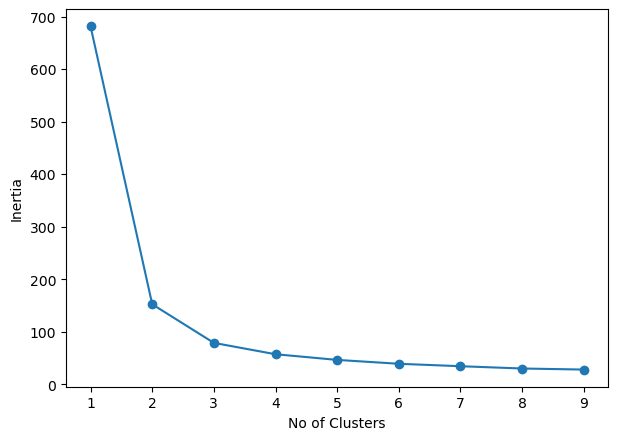

In [5]:
# import kmeans from cluster module

from sklearn.cluster import KMeans

# empty list to contain the inertia score whenever a clustering process is done oevr the data
SSE= [] 
for cluster in range(1,10):
    kmeans= KMeans(n_clusters= cluster)
    kmeans.fit(iris)
    SSE.append(kmeans.inertia_)
    
# now we plot and visualise the results

plt.figure(figsize= (7,5), dpi=100)
plt.plot(range(1,10), SSE, marker= 'o')
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.show

### The elbow method: In this method, the optimum no of clusters is where the elbow occurs, that is when the within cluster sum of squares doesn't decrease significantly with every iteration.
### Here, from the above graph, we choose the number of clusters as 3.

In [6]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [7]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris['cluster']= y_kmeans
iris

,sepalLen_cm,sepalWid_cm,petalLen_cm,petalWid_cm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### VISUALISING CLUSTERS 

**Clustering based on sepalLen_cm and sepalWid_cm**

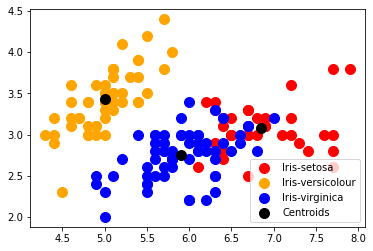

In [8]:

plt.scatter(iris.sepalLen_cm[iris.cluster == 0], iris.sepalWid_cm[iris.cluster == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris.sepalLen_cm[iris.cluster == 1], iris.sepalWid_cm[iris.cluster == 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(iris.sepalLen_cm[iris.cluster == 2], iris.sepalWid_cm[iris.cluster == 2],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

**Clustering based on petalLen_cm and petalWid_cm**

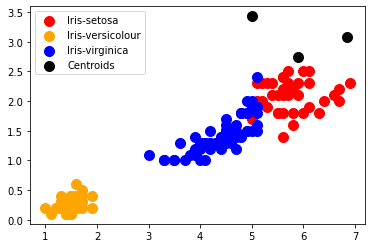

In [9]:

plt.scatter(iris.petalLen_cm[iris.cluster == 0], iris.petalWid_cm[iris.cluster == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris.petalLen_cm[iris.cluster == 1], iris.petalWid_cm[iris.cluster == 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(iris.petalLen_cm[iris.cluster == 2], iris.petalWid_cm[iris.cluster == 2],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()